![](p1.png)

# In this project, I will work on a set of data from scratch to the end.
In order to arrange the presentation of the project, it will be presented to the following panel:
- 1) Gathering data
- 2) Cleaning and handling
- 3) Analysis and graphic visualizations
- 4) Results  


To define the goal in an easy way, I will ask a group of questions at the beginning, to be answered during each stage. If all of these questions are successfully answered, it is measured that the steps were correct.

- Was the file read ?

- Is the data understandable ?

- Has lost data been dealt with ?

- Is there duplicate data ? 

- Have we dealt with the columns, whether "merging the necessary ones" or "removing the unnecessary from them" ?

- Have new columns been added that are useful in the analysis process ? 



,  shall we ?!



##### I would like to draw attention to a very important point:
I preferred to adopt a phase ( 1- Gathering data + 2- Cleaning and handling) for each of the three files

twitter-archive-enhanced : ( 1- Gathering data + 2- Cleaning and handling)

image-predictions : ( 1- Gathering data + 2- Cleaning and handling)

tweet_json.txt : ( 1- Gathering data + 2- Cleaning and handling)

Then I applied ( the analyzes ) , which was the most suitable method for me

In [406]:
#Request the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2


# 1) Gathering data:

The data will be revealed, is it readable or do I need to download it from the Internet, then I will study what the data consists of and is it understandable or need to search for an explanation, immediately after that I will process the data and identify the areas of defect

## twitter-archive:

In [407]:
data = pd.read_csv('twitter-archive-enhanced.csv')
data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [408]:
data.shape

(2356, 17)

In [409]:
#Browse columns:

data.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [410]:
#Find if the data contains missing values or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

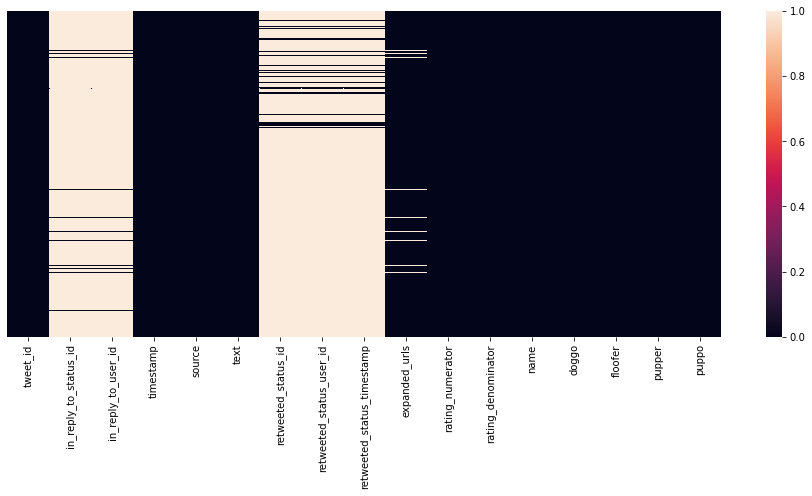

In [411]:
#Find missing data in columns through graphical visualization
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(),yticklabels=False);

Through the graphic visualization, it is clear that there are missing values in the columns, which will be dealt with later

In [412]:
data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [413]:
#Find if your data contains duplicate values
data.tweet_id.duplicated().sum()

0

In [414]:
data.reset_index(inplace=True, drop=True)

In [415]:
data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


# data quality issues :
The most important quality problem I face is with this data

1) There is missing data in the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'ret_status_id',
             'retweeted_status_user_id', 'ret_status_timestamp', 'expanded_urls'

2) The text column contains Retweets, which is something I do not want in data analysis

3) The 'source' column needs to be reformatted

4) There are columns I do not need in the data analysis process

# tidiness issues : 
1) All columns name[  doggo/ floofer/ pupper/ puppo ]need to be within a category and one column: breeds

2) I need a column containing the year / month

3) Some reviews exaggerate the numerators, more than 10 need a filter for them

# 2)Cleaning and handling :

To organize the table more, there are a number of columns that I do not need in analyzing the data now, they will be discarded and deleted

In [416]:
#Here we review a tweet that contains a retweet before deletion

## Write the code :
data.loc[68]

## Code testing :

tweet_id                                                     879130579576475649
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-06-26 00:13:58 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          RT @dog_rates: This is Emmy. She was adopted t...
retweeted_status_id                                                 8.78058e+17
retweeted_status_user_id                                            4.19698e+09
retweeted_status_timestamp                            2017-06-23 01:10:23 +0000
expanded_urls                 https://twitter.com/dog_rates/status/878057613...
rating_numerator                                                             14
rating_denominator                                                           10
name                                    

## Delete tweets related to Retweet: 

In [417]:
## Write the code :

data = data[data.retweeted_status_id.isnull()]
data = data[data.retweeted_status_user_id.isnull()]
data = data[data.retweeted_status_timestamp.isnull()]

## Code testing : 


In [418]:
data['text'].head(70)

0     This is Phineas. He's a mystical boy. Only eve...
1     This is Tilly. She's just checking pup on you....
2     This is Archie. He is a rare Norwegian Pouncin...
3     This is Darla. She commenced a snooze mid meal...
4     This is Franklin. He would like you to stop ca...
                            ...                        
69    This is Steven. He has trouble relating to oth...
70    This is Beau. That is Beau's balloon. He takes...
71    This is Snoopy. He's a proud #PrideMonthPuppo....
72    Martha is stunning how h*ckin dare you. 13/10 ...
75    Meet Shadow. In an attempt to reach maximum zo...
Name: text, Length: 70, dtype: object

In [419]:
## Write the code

data=data.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
            'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

In [420]:
## Code testing
data.shape

(2175, 11)

In [421]:
# If we activate the code present here, it will become clear to us that it cannot be activated and there is an error,
#which is a good indication that the tweet associated with the retweet has been deleted
data.loc[68]

KeyError: 68

# new:

1) I will merge the rows that contain the same classification 

2) The missing data in the columns that I need will also be deleted by the following

In [422]:
## Write the code:


data=pd.melt(data ,id_vars=['tweet_id','timestamp','source','text',
                                      'rating_numerator','name','rating_denominator'],
                 var_name='Dog_breeds', value_name='breeds')


data = data.replace(to_replace='None', value=np.nan).dropna()

data.head()


## Code testing:


,tweet_id,timestamp,source,text,rating_numerator,name,rating_denominator,Dog_breeds,breeds
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,Cassie,10,doggo,doggo
40,884162670584377345,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,12,Yogi,10,doggo,doggo
97,871515927908634625,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,12,Napolean,10,doggo,doggo
108,869596645499047938,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,12,Scout,10,doggo,doggo
206,846514051647705089,2017-03-28 00:07:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,13,Barney,10,doggo,doggo


In [423]:
data.shape

(203, 9)

I will treat the texts here and clean them of any unnecessary symbols:

In [424]:
## Write the code : 

def remove_tags(text):
     return href_tags.sub('', text)

href_tags = re.compile(r'<[^>]+>')
data['source'] = data['source'].apply(remove_tags)


In [425]:
## Code testing

data['source']

9        Twitter for iPhone
40       Twitter for iPhone
97       Twitter for iPhone
108      Twitter for iPhone
206      Twitter for iPhone
               ...         
7100    Vine - Make a Scene
7311     Twitter for iPhone
7383     Twitter for iPhone
7395     Twitter for iPhone
7430     Twitter for iPhone
Name: source, Length: 203, dtype: object

I need to have a rating of "months / years only" to analyze the data
Therefore, two columns will be inserted for them

In [426]:
## Write the code : 

data['timestamp'] = pd.to_datetime(data['timestamp'], infer_datetime_format=True)
data['month_years']=data['timestamp'].dt.strftime('%Y-%b')
data['years']=data['timestamp'].dt.strftime('%Y')

In [427]:
data.head()
data.shape

(203, 11)

In [428]:
data_archive=data.copy()
data_archive

## Code testing:

,tweet_id,timestamp,source,text,rating_numerator,name,rating_denominator,Dog_breeds,breeds,month_years,years
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,Cassie,10,doggo,doggo,2017-Jul,2017
40,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,Yogi,10,doggo,doggo,2017-Jul,2017
97,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,Napolean,10,doggo,doggo,2017-Jun,2017
108,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12,Scout,10,doggo,doggo,2017-May,2017
206,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,13,Barney,10,doggo,doggo,2017-Mar,2017
...,...,...,...,...,...,...,...,...,...,...,...
7100,784183165795655680,2016-10-07 00:06:50,Vine - Make a Scene,This is Reginald. He's one magical puppo. Aero...,12,Reginald,10,puppo,puppo,2016-Oct,2016
7311,751132876104687617,2016-07-07 19:16:47,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,10,Cooper,10,puppo,puppo,2016-Jul,2016
7383,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,9,Abby,10,puppo,puppo,2016-Jun,2016
7395,743253157753532416,2016-06-16 01:25:36,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,10,Kilo,10,puppo,puppo,2016-Jun,2016


In [429]:
data_archive.tweet_id.duplicated().sum()
data_archive=data_archive.drop_duplicates(subset=["tweet_id"])
data_archive

,tweet_id,timestamp,source,text,rating_numerator,name,rating_denominator,Dog_breeds,breeds,month_years,years
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,Cassie,10,doggo,doggo,2017-Jul,2017
40,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,Yogi,10,doggo,doggo,2017-Jul,2017
97,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,Napolean,10,doggo,doggo,2017-Jun,2017
108,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12,Scout,10,doggo,doggo,2017-May,2017
206,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,13,Barney,10,doggo,doggo,2017-Mar,2017
...,...,...,...,...,...,...,...,...,...,...,...
7100,784183165795655680,2016-10-07 00:06:50,Vine - Make a Scene,This is Reginald. He's one magical puppo. Aero...,12,Reginald,10,puppo,puppo,2016-Oct,2016
7311,751132876104687617,2016-07-07 19:16:47,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,10,Cooper,10,puppo,puppo,2016-Jul,2016
7383,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,9,Abby,10,puppo,puppo,2016-Jun,2016
7395,743253157753532416,2016-06-16 01:25:36,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,10,Kilo,10,puppo,puppo,2016-Jun,2016


## right Now :

Was the file read ?!Answer: Yes
Is the data understandable ?!
 Yes

Has lost data been dealt with ?! 
 Yes "deleted"

Is there duplicate data ?!
  No

Have we dealt with the columns, whether "merging the necessary ones" or "removing the unnecessary from them" ?! 
 The answer is yes

Have new columns been added that are useful in the analysis process ?!
 Answer: Yes

## Save now clean data for later use

In [430]:
data_archive.csv=data_archive.to_csv('data_archive.csv', index=False)

In [431]:
#Test that the file is clean and correct
df=pd.read_csv('data_archive.csv')
df

,tweet_id,timestamp,source,text,rating_numerator,name,rating_denominator,Dog_breeds,breeds,month_years,years
0,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,Cassie,10,doggo,doggo,2017-Jul,2017
1,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,Yogi,10,doggo,doggo,2017-Jul,2017
2,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,Napolean,10,doggo,doggo,2017-Jun,2017
3,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12,Scout,10,doggo,doggo,2017-May,2017
4,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,13,Barney,10,doggo,doggo,2017-Mar,2017
...,...,...,...,...,...,...,...,...,...,...,...
193,784183165795655680,2016-10-07 00:06:50,Vine - Make a Scene,This is Reginald. He's one magical puppo. Aero...,12,Reginald,10,puppo,puppo,2016-Oct,2016
194,751132876104687617,2016-07-07 19:16:47,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,10,Cooper,10,puppo,puppo,2016-Jul,2016
195,744995568523612160,2016-06-20 20:49:19,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,9,Abby,10,puppo,puppo,2016-Jun,2016
196,743253157753532416,2016-06-16 01:25:36,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,10,Kilo,10,puppo,puppo,2016-Jun,2016


### The data is almost ready now, readable and the data is clear and easy to analyze, I will now turn to the remaining files

.
.
.
.
.
.

# 1) Gathering data:

## image-predictions:

In [432]:
data_image=pd.read_csv('image-predictions (1).tsv')
data_image.head(5)

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


The file is present, but it seems that at first glance it is a bit difficult and incomprehensible, and if I will solve the problem by the following:

In [433]:
## Write the code : 

data_image = pd.read_csv('image-predictions (1).tsv', sep='\t')
data_image.head(3)

 
## Code testing :

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [434]:
data_image.shape

(2075, 12)

In [435]:
data_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# data quality issues :

1) The data is almost organized and there is no problem except that there is duplicate data in the jpg_url column and the problem will be solved

1 ) I will get rid of the columns that I do not need in the analysis



# tidiness issues :

2 ) The names in P1, P3, and P3 need reformatting


.
.
.


# 2)Cleaning and handling :
The good thing is that the data is almost intact and clean and contains no missing data, I just need a little bit of modification which is to tweak the way names are written in some columns: p1, p2, p3 also, make sure there is no duplicate data.


In [436]:
#We are looking for duplicate data
data_image.jpg_url.duplicated().sum()


66

We look for if some images are duplicated more than once, through the result there are 66 duplicate images links so we will delete the duplication

In [437]:
## Write the code : 

data_image=data_image.drop_duplicates(subset=["jpg_url"])
data_image


## Code testing:

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [438]:
#We check more that there is no duplicate link
## Write the code : 

data_image.jpg_url.duplicated().sum()
 
## Code testing:

0

Now I have two necessary steps:

1 / I will get rid of the columns that I do not need in the analysis

2 / The names in P1, P3, and P3 need reformatting

In [439]:
## Write the code : 
## Code testing:
data_image['p1'] = data_image['p1'].str.lower()
data_image['p2'] = data_image['p2'].str.lower()
data_image['p3'] = data_image['p3'].str.lower()

## Code testing:

In [440]:
data_image=data_image.copy()
data_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


## right Now :
Was the file read ?! Answer: Yes

Is the data understandable ?! No, but the problem has been fixed

Has lost data been dealt with ?! No missing data

Is there duplicate data ?! “Yes, and the problem has been dealt with

Did we deal with the columns, whether "merging what is necessary" or "removing what is unnecessary" ?! The answer is There was no need for that

Have new columns been added useful in the analysis process ?! Answer: No, I did not need to add anything new

# Save now clean data for later use

In [441]:
## Write the code : 

data_image1=data_image.to_csv('data_image.csv', index=False)
df = pd.read_csv('data_image.csv')


## Code testing:
df


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2004,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
2005,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
2006,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2007,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


.
.
.
.
.
.
.
.
.

# 1) Gathering data:

## tweet_json.txt

In [442]:
#Was the file read ?!
data_json = pd.read_json('tweet_json.txt',lines = True)
data_json.head(70)


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2017-06-26 19:07:24+00:00,879415818425184262,879415818425184256,This is Duddles. He did an attempt. 13/10 some...,False,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 879415784908390401, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,107956,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
66,2017-06-26 16:31:08+00:00,879376492567855104,879376492567855104,This is Jack AKA Stephen Furry. You're not sco...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 879376482266632192, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,17099,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
68,2017-06-25 18:56:45+00:00,879050749262655488,879050749262655488,This is Steven. He has trouble relating to oth...,False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 879050744279834628, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,23022,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Now we discover the columns and see if there is any missing data

In [443]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

It is a great tool for exploring the location of lost data

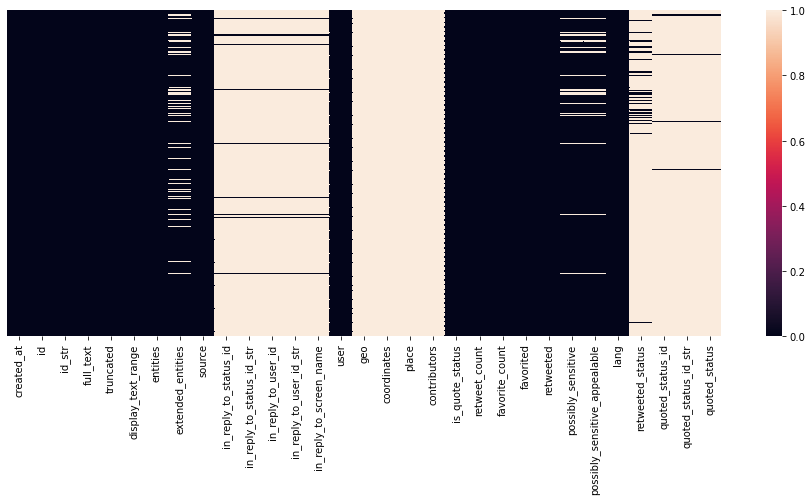

In [444]:
plt.figure(figsize=(16,6))
sns.heatmap(data_json.isnull(),yticklabels=False);

# data quality issues :
The most important quality problem I face is with this data

1) There is missing data in the columns: 
    
    ''in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id',
            'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
                       'coordinates','place','contributors','retweeted_status',
                          'quoted_status_id','quoted_status_id_str','quoted_status',
                          'possibly_sensitive','lang','possibly_sensitive_appealable',
                          'is_quote_status','favorited','retweeted','display_text_range',
                          'truncated','extended_entities','entities','user','entities','extended_entities'

2) The full_text column contains Retweets, which is something I do not want in data analysis

3) The 'source' column needs to be reformatted

4) There are columns I do not need in the data analysis process


# tidiness issues :



1) I need a column containing the year / month



# 2)Cleaning and handling :

We note that most of the missing data is in columns that I do not need in the first place in this analysis, so these columns will be deleted first.

In [445]:
#Here we review a tweet that contains a retweet before deletion


## Write the code :
data_json.loc[67]


## Code testing:

created_at                                               2017-06-26 00:13:58+00:00
id                                                              879130579576475649
id_str                                                          879130579576475648
full_text                        RT @dog_rates: This is Emmy. She was adopted t...
truncated                                                                    False
display_text_range                                                        [0, 140]
entities                         {'hashtags': [], 'symbols': [], 'user_mentions...
extended_entities                                                              NaN
source                           <a href="http://twitter.com/download/iphone" r...
in_reply_to_status_id                                                          NaN
in_reply_to_status_id_str                                                      NaN
in_reply_to_user_id                                                            NaN
in_r

In [446]:
## Write the code : 

data_json = data_json[data_json.retweeted_status.isnull()]

## Code testing:

In [447]:
## Write the code : 

data_json=data_json.drop(['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id',
            'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
                       'coordinates','place','contributors','retweeted_status',
                          'quoted_status_id','quoted_status_id_str','quoted_status',
                          'possibly_sensitive','lang','possibly_sensitive_appealable',
                          'is_quote_status','favorited','retweeted','display_text_range',
                          'truncated','extended_entities','entities','user','entities','extended_entities'], axis=1)

## Write the code : 
## Code testing:

In [448]:
# If we activate the code present here, it will become clear to us that it cannot be activated and there is an error,
#which is a good indication that the tweet associated with the retweet has been deleted

## Write the code : 

data_json.loc[67]

## Code testing:

KeyError: 67

In [449]:
#Now we are testing whether the missing data issue has been resolved correctly
data_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2175 non-null   datetime64[ns, UTC]
 1   id              2175 non-null   int64              
 2   id_str          2175 non-null   int64              
 3   full_text       2175 non-null   object             
 4   source          2175 non-null   object             
 5   retweet_count   2175 non-null   int64              
 6   favorite_count  2175 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 215.9+ KB


In [450]:
#Process the encoding in the texts
## Write the code : 

def remove_tags(text):
     return href_tags.sub('', text)

href_tags = re.compile(r'<[^>]+>')
data_json['source'] = data_json['source'].apply(remove_tags)

In [451]:

## Code testing:
data_json['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2349    Twitter for iPhone
2350    Twitter for iPhone
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
Name: source, Length: 2175, dtype: object

In [452]:

#I need to add something very important, which are columns that classify the date for me as "year, month / year"
## Write the code : 

data_json['created_at'] = pd.to_datetime(data_json.created_at, format='%Y-%m-%d %H:%M:%S')
data_json['time']=data_json['created_at'].dt.strftime('%Y-%b')
data_json['year']=data_json['created_at'].dt.strftime('%Y')
data_json

 
## Code testing:

,created_at,id,id_str,full_text,source,retweet_count,favorite_count,time,year
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,8853,39467,2017-Aug,2017
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,Twitter for iPhone,6514,33819,2017-Aug,2017
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,4328,25461,2017-Jul,2017
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,8964,42908,2017-Jul,2017
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,Twitter for iPhone,9774,41048,2017-Jul,2017
...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,Twitter for iPhone,41,111,2015-Nov,2015
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,Twitter for iPhone,147,311,2015-Nov,2015
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,Twitter for iPhone,47,128,2015-Nov,2015
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,Twitter for iPhone,48,132,2015-Nov,2015


In [453]:
data_json.shape

(2175, 9)

In [454]:
data_json=data_json.copy()

# right Now :
Was the file read ?! Answer: Yes

Is the data understandable ?! Yes

Has lost data been dealt with ?! yes "deleted"

Have we dealt with the columns, whether "merging the necessary ones" or "removing the unnecessary from them" ?! The answer is yes

Have new columns been added that are useful in the analysis process ?! Answer: yes

# At least eight (8) data quality issues and two (2) ranking issues were detected:

Here I will now review all the quality issues that were made to the three files:



# twitter-archive-enhanced

## data quality issues :    
The most important quality problem I face is with this data

1) There is missing data in the columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'ret_status_id', 'retweeted_status_user_id', 'ret_status_timestamp', 'expanded_urls'

2) The text column contains Retweets, which is something I do not want in data analysis

3) The 'source' column needs to be reformatted

4) There are columns I do not need in the data analysis process
 
5) Some reviews exaggerate the numerators, more than 10 need a filter for them 

6)Clean up incorrect names


##  tidiness issues :

1) All columns name[ doggo/ floofer/ pupper/ puppo ]need to be within a category and one column: breeds

2) I need a column containing the year / month





# image-predictions


## data quality issues :
1) The data is almost organized and there is no problem except that there is duplicate data in the jpg_url column and the problem will be solved

2 ) I will get rid of the columns that I do not need in the analysis


## tidiness issues :
1 ) The names in P1, P3, and P3 need reformatting




# tweet_json

## data quality issues :
The most important quality problem I face is with this data

1) There is missing data in the columns:

''in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id',
        'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
                   'coordinates','place','contributors','retweeted_status',
                      'quoted_status_id','quoted_status_id_str','quoted_status',
                      'possibly_sensitive','lang','possibly_sensitive_appealable',
                      'is_quote_status','favorited','retweeted','display_text_range',
                      'truncated','extended_entities','entities','user','entities','extended_entities'
2) The full_text column contains Retweets, which is something I do not want in data analysis

3) The 'source' column needs to be reformatted

4) There are columns I do not need in the data analysis process

## tidiness issues :
1) I need a column containing the year / month
.
.
.
.
 ----


## The grand total issues : 



# data quality issues : 12 issues
#  tidiness issues : 4 issues



# Save now clean data for later use

In [455]:
## Write the code : 

data_json.csv=data_json.to_csv('data_json.csv', index=False)
 
## Code testing:
df_data_json_df = pd.read_csv('data_json.csv')
df_data_json_df

,created_at,id,id_str,full_text,source,retweet_count,favorite_count,time,year
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,8853,39467,2017-Aug,2017
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,Twitter for iPhone,6514,33819,2017-Aug,2017
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,4328,25461,2017-Jul,2017
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,8964,42908,2017-Jul,2017
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,Twitter for iPhone,9774,41048,2017-Jul,2017
...,...,...,...,...,...,...,...,...,...
2170,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,Twitter for iPhone,41,111,2015-Nov,2015
2171,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,Twitter for iPhone,147,311,2015-Nov,2015
2172,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,Twitter for iPhone,47,128,2015-Nov,2015
2173,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,Twitter for iPhone,48,132,2015-Nov,2015


### Information about one type of monitoring unit (Tweets) is spread across three different files / data frames. Therefore these three data frames should be combined because they are part of the same monitoring unit.

In [456]:
## Write the code : 


In [457]:
d1= pd.read_csv('data_archive.csv')

In [458]:
d2= pd.read_csv('data_image.csv')

In [459]:
d3=pd.read_csv('data_json.csv')

In [460]:
df1=pd.merge(d1,d2)

In [461]:
df=pd.merge(df1,d3)

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383907 entries, 0 to 383906
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tweet_id            383907 non-null  int64  
 1   timestamp           383907 non-null  object 
 2   source              383907 non-null  object 
 3   text                383907 non-null  object 
 4   rating_numerator    383907 non-null  int64  
 5   name                383907 non-null  object 
 6   rating_denominator  383907 non-null  int64  
 7   Dog_breeds          383907 non-null  object 
 8   breeds              383907 non-null  object 
 9   month_years         383907 non-null  object 
 10  years               383907 non-null  int64  
 11  jpg_url             383907 non-null  object 
 12  img_num             383907 non-null  int64  
 13  p1                  383907 non-null  object 
 14  p1_conf             383907 non-null  float64
 15  p1_dog              383907 non-nul

In [463]:
#We choose only important columns

df=df[['tweet_id','time','timestamp','source','text','breeds','name','jpg_url','rating_numerator',
       'rating_denominator','retweet_count','favorite_count']]
df

,tweet_id,time,timestamp,source,text,breeds,name,jpg_url,rating_numerator,rating_denominator,retweet_count,favorite_count
0,890240255349198849,2017-Aug,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,8853,39467
1,890240255349198849,2017-Aug,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,6514,33819
2,890240255349198849,2017-Jul,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,4328,25461
3,890240255349198849,2017-Jul,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,8964,42908
4,890240255349198849,2017-Jul,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...
383902,750011400160841729,2016-Jul,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,2772,5569
383903,750011400160841729,2015-Dec,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,1554,3891
383904,750011400160841729,2015-Dec,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,10034,13959
383905,750011400160841729,2015-Dec,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,994,2818


### The new file will be saved with the name: ( twitter_archive_master ) 

In [464]:
twitter_archive_master=df.copy()
twitter_archive_master=twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master



## Code testing:

,tweet_id,time,timestamp,source,text,breeds,name,jpg_url,rating_numerator,rating_denominator,retweet_count,favorite_count
0,890240255349198849,2017-Aug,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,8853,39467
1,890240255349198849,2017-Aug,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,6514,33819
2,890240255349198849,2017-Jul,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,4328,25461
3,890240255349198849,2017-Jul,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,8964,42908
4,890240255349198849,2017-Jul,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,doggo,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,14,10,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...
383902,750011400160841729,2016-Jul,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,2772,5569
383903,750011400160841729,2015-Dec,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,1554,3891
383904,750011400160841729,2015-Dec,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,10034,13959
383905,750011400160841729,2015-Dec,2016-07-04 17:00:26,TweetDeck,Meet Piper. She's an airport doggo. Please ret...,doggo,Piper,https://pbs.twimg.com/media/CmfmvGUWgAAuVKD.jpg,11,10,994,2818





---








![](p3.png)



# 3) analysis: [ (df_archive) - (data_image) - (data_json) ] 

In [376]:
data_archive.head()


,tweet_id,timestamp,source,text,rating_numerator,name,rating_denominator,Dog_breeds,breeds,month_years,years
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14,Cassie,10,doggo,doggo,2017-Jul,2017
40,884162670584377345,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,12,Yogi,10,doggo,doggo,2017-Jul,2017
97,871515927908634625,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,12,Napolean,10,doggo,doggo,2017-Jun,2017
108,869596645499047938,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,12,Scout,10,doggo,doggo,2017-May,2017
206,846514051647705089,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,13,Barney,10,doggo,doggo,2017-Mar,2017


## Now there are a large number of questions, and they are the following:

1- How many dog breeds are there

2- What are the most common names for dogs?

3- What are the sources of interaction on Twitter?

4- The percentage of each item from the total?

5-In 2016 who is the most popular, acquired and popular breed?

6-In 2017 who is the most popular, acquired and popular breed?

7-What is the list of dogs with a 10/10 rating that are popular with people?

In [377]:
## 1- How many dog breeds are there?
data_archive.breeds.value_counts()

pupper     132
doggo       45
puppo       16
floofer      5
Name: breeds, dtype: int64

In [378]:

#Clean up incorrect names:
    
#2- What are the most common names for dogs?
data_archive.name.value_counts().head(50)

a            4
Cooper       3
Boomer       2
Milo         2
Gus          2
Loki         2
the          2
one          2
Pickles      2
Bo           2
Oliver       2
just         2
Sampson      2
Chuckles     2
Fletcher     1
Sansa        1
Rolf         1
Sundance     1
Zoe          1
all          1
Trevith      1
Blu          1
Blakely      1
Superpup     1
Hamrick      1
Roscoe       1
Shikha       1
Doobert      1
Mollie       1
Jed          1
Jazz         1
Bayley       1
Kawhi        1
Louie        1
Chet         1
Brandy       1
Doc          1
Scooter      1
Grizzwald    1
Abby         1
Jax          1
Miguel       1
Diogi        1
Lola         1
Gabe         1
Clyde        1
Eve          1
Mona         1
Wishes       1
Kilo         1
Name: name, dtype: int64

In [379]:
# Writing the code:

    
data_archive = data_archive.replace(to_replace='a' , value='nan').dropna()
data_archive = data_archive.replace(to_replace='his', value='nan').dropna()
data_archive = data_archive.replace(to_replace='the', value='nan').dropna()
data_archive = data_archive.replace(to_replace='all', value='nan').dropna()
data_archive = data_archive.replace(to_replace='one', value='nan').dropna()
data_archive = data_archive.replace(to_replace='just', value='nan').dropna()

# Test :

In [380]:
data_archive.name.value_counts().head(50)

nan          12
Cooper        3
Milo          2
Bo            2
Oliver        2
Gus           2
Sampson       2
Pickles       2
Chuckles      2
Boomer        2
Loki          2
Sundance      1
Meera         1
Rolf          1
Trevith       1
Blu           1
Zoe           1
Superpup      1
Blakely       1
Sansa         1
Kawhi         1
Buckley       1
Sebastian     1
Mollie        1
Jazz          1
Gabe          1
Cupid         1
Hamrick       1
Yogi          1
Diogi         1
Brandy        1
Roscoe        1
Clyde         1
Lola          1
Abby          1
Doc           1
Fletcher      1
Louie         1
Scooter       1
Wishes        1
Lucy          1
Winston       1
Chet          1
Miguel        1
Kilo          1
Kona          1
Mona          1
Eve           1
Gerbald       1
Stuart        1
Name: name, dtype: int64

In [381]:
#3- What are the sources of interaction on Twitter?
data_archive.source.value_counts()

Twitter for iPhone     189
Vine - Make a Scene      8
TweetDeck                1
Name: source, dtype: int64

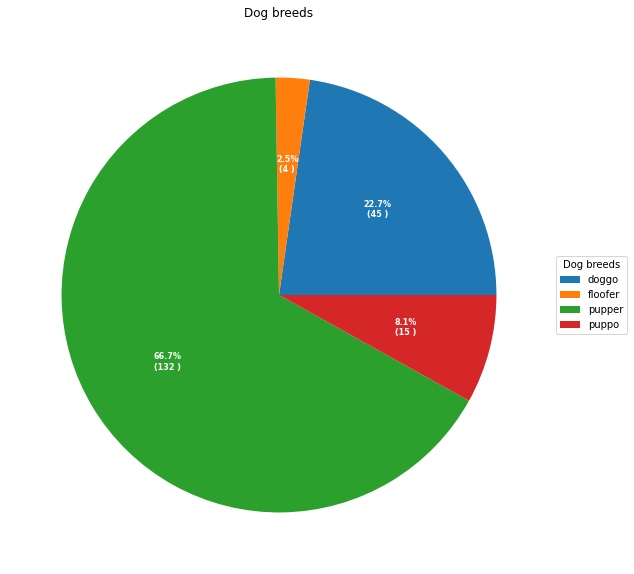

In [382]:
#4- The percentage of each item from the total

## Write the code : 


fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

recipe = ["45 doggo",
          "5 floofer",
          "132 pupper",
          "16 puppo"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Dog breeds",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Dog breeds")

plt.show()



## Code testing:

In [383]:
#5-In 2016 who is the most popular, acquired and popular breed?
## Write the code : 

years_2016=data_archive.loc[data_archive['years']== '2016',['name','breeds','years']]
years_2016.breeds.value_counts()


## Code testing:

pupper     78
doggo      23
puppo      10
floofer     4
Name: breeds, dtype: int64

In [384]:
#6-In 2017 who is the most popular, acquired and popular breed?
## Write the code : 

years_2017=data_archive.loc[data_archive['years']== '2017',['name','breeds','years']]
years_2017.breeds.value_counts()

 
## Code testing:

doggo      22
pupper     15
puppo       6
floofer     1
Name: breeds, dtype: int64

### When I delved into the data analysis, I noticed a problem with the quality of the data in each of the columns:rating_numerator , rating_denominator
The problem is that the rating is supposed to be within (0-10) for both numerator and denominator, but perhaps due to technical problems, or that some people have a strong love for dogs "who can blame them ???, because they are very cute" so they allowed themselves to rate it high As a joke

Solving this problem is very simple, through the filter, I will design a filter as follows:

['rating_numerator']<=10

['rating_denominator']==10


In [385]:

## Write the code : 

rating=data_archive.loc[(data_archive['rating_numerator']<=10)&(data_archive['rating_denominator']==10),['years','source',
                                                                                                       'breeds',
                                                                                                       'name','text',
                                                                                                       'rating_numerator',
 
                                                                                                         'rating_denominator']]


## Code testing:
rating


,years,source,breeds,name,text,rating_numerator,rating_denominator
567,2016,Twitter for iPhone,doggo,Pinot,This is Pinot. He's a sophisticated doggo. You...,10,10
674,2016,Twitter for iPhone,doggo,Gerald,Meet Gerald. He's a fairly exotic doggo. Floof...,8,10
817,2016,Twitter for iPhone,doggo,nan,That is Quizno. This is his beach. He does not...,10,10
853,2016,Twitter for iPhone,doggo,Lenox,This is Lenox. She's in a wheelbarrow. Silly d...,10,10
925,2016,Twitter for iPhone,doggo,Kellogg,This is Kellogg. He accidentally opened the fr...,8,10
...,...,...,...,...,...,...,...
6186,2015,Twitter for iPhone,pupper,Opal,This is Opal. He's a Royal John Coctostan. Rea...,9,10
6188,2015,Twitter for iPhone,pupper,Bubba,This is Bubba. He's a Titted Peebles Aorta. Ev...,8,10
7311,2016,Twitter for iPhone,puppo,Cooper,This is Cooper. He's just so damn happy. 10/10...,10,10
7383,2016,Twitter for iPhone,puppo,Abby,This is Abby. She got her face stuck in a glas...,9,10


Now the evaluation is in the numerator from (0-10), and the denominator is fixed to 10

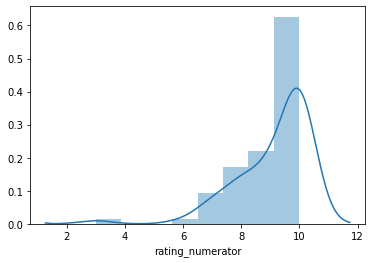

In [386]:
#Let's now see the rating distribution on the graphic visualization

## Write the code : 

sns.distplot(rating['rating_numerator']);


## Code testing:

In [387]:
#7- What is the list of dogs with a 10/10 rating that are popular with people?
## Write the code : 

top_10=rating.loc[rating['rating_numerator']== 10 ,['breeds','name','rating_numerator']]
top_10.head(10)

## Code testing:

,breeds,name,rating_numerator
567,doggo,Pinot,10
817,doggo,nan,10
853,doggo,Lenox,10
3107,floofer,Moose,10
5294,pupper,Rooney,10
5329,pupper,Ashleigh,10
5345,pupper,Derek,10
5369,pupper,Smokey,10
5414,pupper,Winston,10
5478,pupper,Finnegus,10


In [388]:
#The total number of dogs of all species (10\10)
top_10.breeds.value_counts()

pupper     34
doggo       3
puppo       2
floofer     1
Name: breeds, dtype: int64

In [389]:
#The total number of dogs of all species(1-10)
rating.rating_numerator.value_counts()

10    40
9     14
8     11
7      6
6      1
3      1
Name: rating_numerator, dtype: int64

In [390]:
d_text=data_archive.loc[0: , ['tweet_id','text']]
d_text

,tweet_id,text
9,890240255349198849,This is Cassie. She is a college pup. Studying...
40,884162670584377345,Meet Yogi. He doesn't have any important dog m...
97,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...
108,869596645499047938,This is Scout. He just graduated. Officially a...
206,846514051647705089,This is Barney. He's an elder doggo. Hitches a...
...,...,...
7100,784183165795655680,This is Reginald. He's one magical puppo. Aero...
7311,751132876104687617,This is Cooper. He's just so damn happy. 10/10...
7383,744995568523612160,This is Abby. She got her face stuck in a glas...
7395,743253157753532416,This is Kilo. He cannot reach the snackum. Nif...


# Conclusions:

1) The tweets were all about 4 types of dog breeds

2) The pupper breed formed the majority with 132 dogs, by 66%.

3) The floofer strain was the least popular of the four strains, with 2% "from the sample".

4) Sampson is one of the most popular names among dogs

5) There were four different sources that published the changes, most of them via the iPhone mobile app, where they were in the range of 189

6) In 2016 /pupper was the most popular tweet Whereas in 2017 / a platoon swapped doggo The first place among the dog factions

7) The distribution on the graph shows that 40 tweets received a 10/10 rating

# Perceptions:
Based on previous conclusions

1) The pupper will be the most acquisition and popular among families

2) The project also demonstrates the popularity of the iPhone device among the general public

In [391]:
#First I will make a copy of the previous data
df_image= data_image.copy()
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


In [392]:
data_image.p1.value_counts()

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    55
                     ... 
fire_engine             1
slug                    1
cliff                   1
beaver                  1
zebra                   1
Name: p1, Length: 378, dtype: int64

In [393]:
data_image.p2.value_counts()

labrador_retriever          96
golden_retriever            83
cardigan                    73
chihuahua                   43
chesapeake_bay_retriever    40
                            ..
sweatshirt                   1
grey_fox                     1
dumbbell                     1
snorkel                      1
crutch                       1
Name: p2, Length: 404, dtype: int64

In [394]:
data_image.p3.value_counts()

labrador_retriever     76
chihuahua              57
golden_retriever       46
eskimo_dog             36
kelpie                 33
                       ..
meerkat                 1
american_black_bear     1
chain                   1
hand_blower             1
crayfish                1
Name: p3, Length: 408, dtype: int64

Note that the most guesses are for golden_retriever by 139, while the second is labrador_retriever got 95 

Fundamental analysis total confidence levels if:

(p2_conf + p3_conf)< p1_conf 

IF The predictions for p1_conf were correct

In [395]:

## Write the code : 

x=(((data_image.p1_conf < data_image.p2_conf + data_image.p3_conf) & (data_image.p1_dog == True)))
x.sum(axis=0)


## Code testing:

256

In [396]:

## Write the code : 

x=(((data_image.p1_conf < data_image.p2_conf + data_image.p3_conf) & (data_image.p1_dog == False)))
x.sum(axis=0)


## Code testing:

120

Fundamental analysis total confidence levels if:

                          
                              (p2_conf + p3_conf)> p1_conf

IF The predictions for p1_conf were correct

So based on the previous, there are interesting conclusions here, as we note that it has the highest share in identifying images with greater confidence than the two groups.

# Conclusions:
1)the most guesses are for golden_retriever by 139, while the second is labrador_retriever got 96

2) The p1 group gets the upper bound of the correct prediction


# Perceptions:

1)Through each of the following p1,p2,and p3, we note popularity ( golden_retriever ) among the general public 
Because based on the statistics, we notice that in the first group it is issued with 139
Any difference (43) from the first place in a group p2
And a difference (63) from the second place in the group p3

..
..
..

# 3) analysis :data_json

In [397]:
#First I will make a copy of the previous data
df_json=data_json.copy()
df_json.head(3)

,created_at,id,id_str,full_text,source,retweet_count,favorite_count,time,year
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,8853,39467,2017-Aug,2017
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,Twitter for iPhone,6514,33819,2017-Aug,2017
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,4328,25461,2017-Jul,2017


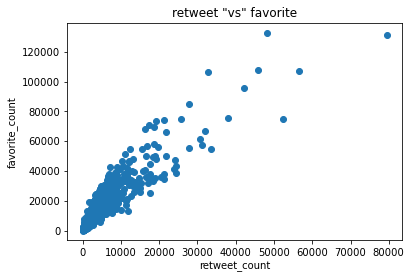

In [398]:

#I am looking for a relationship The relationship between retweet and favorite

## Write the code : 

plt.scatter(data_json.retweet_count, data_json.favorite_count)
plt.title('retweet "vs" favorite')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()


## Code testing:

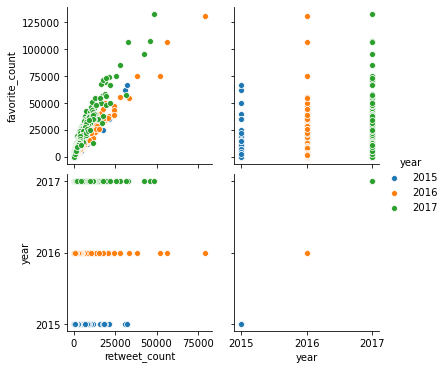

In [399]:


## Write the code : 

sns.pairplot(

df_json,
hue='year',    
x_vars=['retweet_count','year'], 
y_vars=['favorite_count','year']     

);


## Code testing:

In [400]:
#Classification of changes based on

## Write the code : 

sub_favorite_count=data_json[['id','full_text','favorite_count','time']]
sub_favorite_count=sub_favorite_count.sort_values('favorite_count',ascending=False)
sub_favorite_count


## Code testing:

,id,full_text,favorite_count,time
412,822872901745569793,Here's a super supportive puppo participating ...,132810,2017-Jan
1037,744234799360020481,Here's a doggo realizing you can stand in a po...,131075,2016-Jun
65,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,107956,2017-Jun
533,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,107015,2016-Dec
134,866450705531457537,This is Jamesy. He gives a kiss to every other...,106827,2017-May
...,...,...,...,...
2317,666447344410484738,This is Scout. She is a black Downton Abbey. I...,107,2015-Nov
2296,667070482143944705,After much debate this dog is being upgraded t...,88,2015-Nov
2337,666102155909144576,Oh my. Here you are seeing an Adobe Setter giv...,81,2015-Nov
341,832088576586297345,@docmisterio account started on 11/15/15,72,2017-Feb


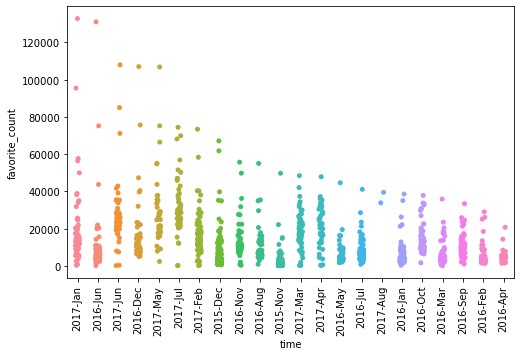

In [401]:

## Write the code : 

plt.figure(figsize=(8,5))
sns.stripplot(x='time', y='favorite_count', data=sub_favorite_count );
plt.xticks(rotation=90);


## Code testing:

In [402]:
## Write the code : 

to_10=data_json.loc[data_json['favorite_count']== 0 ,['full_text','favorite_count','retweet_count']]
to_10.full_text.count()

## Code testing:

0

In [403]:
## Write the code : 


to_1=data_json.loc[data_json['retweet_count']== 0 ,['full_text','favorite_count','retweet_count']]
to_1.full_text.count()

## Code testing:

1

In [404]:
#Classification of changes based on

## Write the code : 

sub_retweet_count=data_json[['full_text','retweet_count','time']]
sub_retweet_count=sub_retweet_count.sort_values('retweet_count',ascending=False)
sub_retweet_count


## Code testing:

,full_text,retweet_count,time
1037,Here's a doggo realizing you can stand in a po...,79515,2016-Jun
533,This is Stephan. He just wants to help. 13/10 ...,56625,2016-Dec
1077,Here's a doggo blowing bubbles. It's downright...,52360,2016-Jun
412,Here's a super supportive puppo participating ...,48265,2017-Jan
65,This is Duddles. He did an attempt. 13/10 some...,45849,2017-Jun
...,...,...,...
341,@docmisterio account started on 11/15/15,3,2017-Feb
112,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,3,2017-Jun
273,@0_kelvin_0 &gt;10/10 is reserved for puppos s...,3,2017-Mar
1293,@serial @MrRoles OH MY GOD I listened to all o...,2,2016-Mar


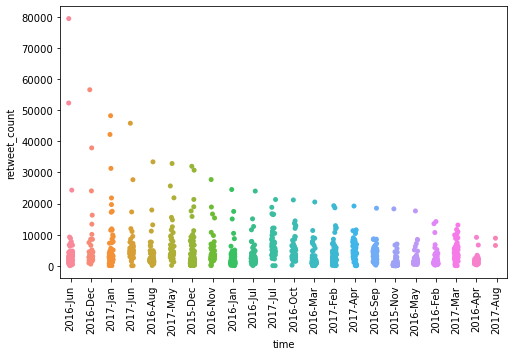

In [405]:
plt.figure(figsize=(8,5))
sns.stripplot(x='time', y='retweet_count', data=sub_retweet_count );
plt.xticks(rotation=90);

# Conclusions:
1) January in 2017 saw the most favorite tweet that featured a puppo dog where she was equals 132810


2) The month of June in 2016 witnessed the most retweeting of a tweet that included a dog from the doggo, where it was equal to 79515


# Perceptions:
There is an important note that can be used for any e-commerce business
Based on previous analyzes, we note that Twitter is in constant activity during the month of June for each of the year 2017/2016, perhaps in some countries it corresponds to special occasions or holidays for them.
Also  December of the vital months in the mentioned years, this point can be used to support any electronic activity on Twitter



![](p8.png)